# Where does received level decrease come from for SMP mics?
I attached the SMP mic to a cardboard sheet and aligned it to a Polaroid speaker. See [Calibration docs](april2021-mic-calibrations.md). 

I observed a reduction in received level as the speaker was more off-axis. My question: is this because of the background (the sheet/'wall') or is it actually the mics directionality that I'm seeing. 

To answer this I first recorded sounds at 0-90degrees. Then I created a 'pseudo-90' degrees position, where I set the turntable to 90deg but made the microphone face the speaker. If there is no effect of the wall on playback level, then the pseudo-90 degrees should have the same received level as the 0 degrees. Let's see if this is true. 

In [1]:
import glob
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.signal as signal 
import soundfile as sf

In [2]:
%matplotlib notebook

In [3]:
fs = 192000
b,a = signal.butter(2,5000/fs*0.5,'high')
highpass = lambda X: signal.filtfilt(b,a,X)
dB = lambda X : 20*np.log10(abs(X))
dbrms = lambda X: dB(np.sqrt(np.mean(X**2.0)))

In [4]:
wavfiles = glob.glob('2021-04-15/*.wav')+glob.glob('2021-04-16/*.wav')
wavfiles

['2021-04-15\\SMP1_gaindB_30_azimuth_angle_0_2021-04-15_18-56-27.wav',
 '2021-04-15\\SMP1_gaindB_30_azimuth_angle_30_2021-04-15_18-57-21.wav',
 '2021-04-15\\SMP1_gaindB_30_azimuth_angle_60_2021-04-15_18-58-03.wav',
 '2021-04-15\\SMP1_gaindB_30_azimuth_angle_90_2021-04-15_18-58-48.wav',
 '2021-04-15\\SMP1_gaindB_30_azimuth_angle_pseudo90_2021-04-15_19-01-44.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_0_2021-04-16_15-36-15.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_0_2021-04-16_18-04-42.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_0_2021-04-16_18-12-02.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_0_2021-04-16_18-14-35.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_0_2021-04-16_18-15-35.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_0_2021-04-16_18-21-06.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_30_2021-04-16_18-05-19.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_30_2021-04-16_18-22-33.wav',
 '2021-04-16\\SMP1_gaindB_30_azimuth_angle_60_2021-04-16_18-05-51

In [5]:
for each in wavfiles:
    print(sf.info(each).duration)

18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0


All files have the same duration - which means we can just compare the dB rms of all files after highpassing. 

In [6]:
half_durn = 9 # secs
half_durnsamples = int(half_durn*fs)
sweeps_section = int(1.5*fs)
audio_hp = []
tones_dbrms = []
audio_dbrms1half = []
audio_dbrms2half = []
sweeps_dbrms = []
silence_dbrms = []
tones_dbrms = []
for each in wavfiles:
    audio,fs = sf.read(each)
    highpassed = highpass(audio)
    audio_hp.append(highpassed)
    tones_dbrms.append(dbrms(highpassed[int(1.5*fs):]))
    audio_dbrms1half.append(dbrms(highpassed[int(1.5*fs):half_durnsamples]))
    audio_dbrms2half.append(dbrms(highpassed[half_durnsamples:]))
    sweeps_dbrms.append(dbrms(highpassed[int(0.5*fs):sweeps_section]))
    silence_dbrms.append(dbrms(highpassed[:int(0.5*fs)]))

In [7]:
wavfiles;

In [8]:
angles = [each.split('_')[5] for each in wavfiles]

<IPython.core.display.Javascript object>


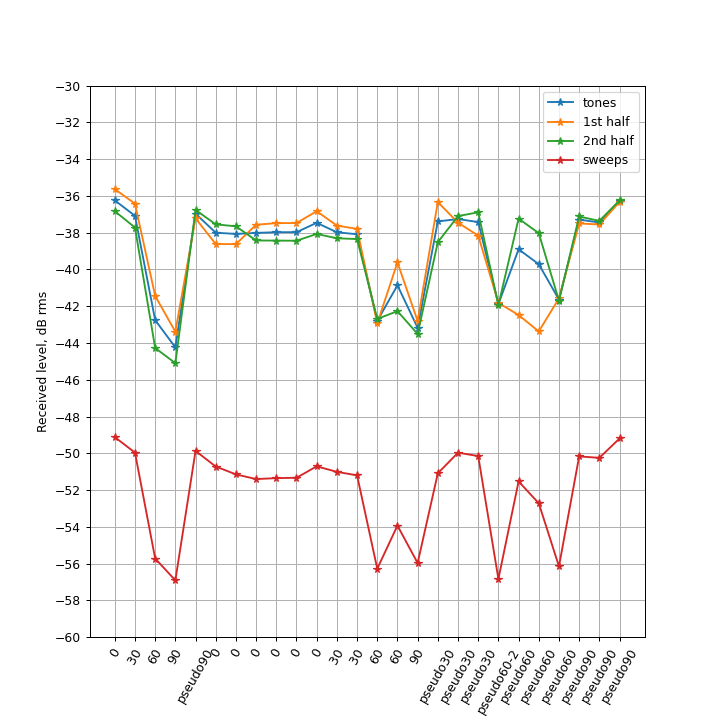

In [9]:
plt.figure(figsize=(8,8))
plt.plot(tones_dbrms,'-*',label='tones')
plt.plot(audio_dbrms1half,'-*',label='1st half')
plt.plot(audio_dbrms2half,'-*',label='2nd half')
plt.plot(sweeps_dbrms,'-*',label='sweeps')
plt.xticks(range(len(wavfiles)),angles,rotation=60);
plt.legend()
plt.ylim(-60,-30);plt.yticks(np.arange(-60,-28,2));plt.grid()
plt.ylabel('Received level, dB rms');plt.xlabel('Orientation to speaker')
plt.savefig('imgs/no-board-effect.jpg')

The received level at pseudo-90 is very close to that at 0 or 30 degrees. This tells me that the 'wall' itself is not blocking/collecting sound to the microphone. 

However, it is important to note that for one position, there is a very large discrepancy - pseudo60, where the difference between on-axis and measured is ~4dB! This is much larger than the max 2dB seen for other positions. 


### The situation is a bit unclear ....

In [10]:
print(f'Notebook last run {dt.datetime.now()}')

Notebook last run 2021-04-16 18:28:47.647784
